In [30]:
# !pip install matplotlib

# !pip install plotly tkhtmlview
# !pip install pywebview

# !pip install matplotlib

In [ ]:
import os

os.chdir("..")
os.chdir("..")
os.chdir("..")

!dir

 O volume na unidade C � OS
 O N�mero de S�rie do Volume � A2FB-FA56

 Pasta de c:\pyprojects\fast-english

05/05/2025  08:24    <DIR>          .
23/04/2025  08:12    <DIR>          ..
23/04/2025  08:12    <DIR>          .github
05/05/2025  08:24             4.368 .gitignore
23/04/2025  08:36    <DIR>          .venv
23/04/2025  08:12             8.923 anki_cards.txt
05/05/2025  08:24    <DIR>          app
05/05/2025  08:24    <DIR>          database
23/04/2025  08:12    <DIR>          docs
23/04/2025  17:13             2.172 extarct_words.ipynb
05/05/2025  08:24    <DIR>          extract_data_video
24/04/2025  13:55            14.146 feets_tkinter.ipynb
05/05/2025  08:24               776 game_data_.csv
05/05/2025  08:24               994 game_data_teste_1.csv
24/04/2025  11:43    <DIR>          gui
23/04/2025  08:12                20 mkdocs.yml
23/04/2025  08:12            42.816 output.mp3
28/04/2025  08:06           403.736 poetry.lock
28/04/2025  08:06             1.168 pyproject.t

In [33]:
import pandas as pd

df = pd.read_csv("database/infos/game_data_hangman.csv")

In [20]:
df

,datetime,word,hint,won,difficulty,total_attempts,used_attempts,correct_guessed_letters,incorrect_guessed_letters,correct_guesses,incorrect_guesses,time_taken,game_name,clicks_on_guess,category,sub_category,id_game
0,2025-05-01T08:48:23,cramped,NaN,False,1.00,6,6,c,"o,l,q,s,f,w",NaN,NaN,NaN,hangman,NaN,NaN,NaN,NaN
1,2025-05-01T08:48:44,clean,NaN,True,0.00,6,0,"c,l,e,a,n",NaN,NaN,NaN,NaN,hangman,NaN,NaN,NaN,NaN
2,2025-05-01T09:00:43,noisy,NaN,True,0.00,6,0,"n,o,i,s,y",NaN,NaN,NaN,12.170000,hangman,NaN,NaN,NaN,NaN
3,2025-05-01T09:01:24,dusty,NaN,True,0.67,6,4,"d,u,s,t,y","r,i,e,p",NaN,NaN,39.730000,hangman,NaN,NaN,NaN,NaN
4,2025-05-01T09:02:01,contemporary,NaN,True,0.00,6,0,"c,o,n,t,e,m,p,o,r,a,r,y",NaN,NaN,NaN,34.690000,hangman,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,2025-05-05T15:14:11,to purchase,comprar,False,1.00,6,6,"t,o,u,h,a,s,e","w,y,f,d,b,i",NaN,NaN,93.060228,hangman,14.0,compras,compras_online,5f5e0b5a5b2c93cb
350,2025-05-05T15:14:53,order,a encomenda,False,1.00,6,6,e,"n,h,f,t,c,a",NaN,NaN,36.034869,hangman,7.0,compras,compras_online,5f5e0b5a5b2c93cb
351,2025-05-05T15:15:43,refund,o reembolso,False,1.00,6,6,"r,e,n,d","q,h,c,b,m,s",NaN,NaN,44.026440,hangman,11.0,compras,compras_online,5f5e0b5a5b2c93cb
352,2025-05-05T15:15:55,account,a conta,True,0.00,6,0,"a,c,c,o,u,n,t",NaN,NaN,NaN,9.006426,hangman,3.0,compras,compras_online,5f5e0b5a5b2c93cb


In [31]:
len(df["word"].unique())

171

In [69]:
# df.dropna(subset="category", inplace=True)
# df["category"] = df["category"].astype(int)



In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def gra_stydy_daily(ax: plt.Axes, df):
    df_word_count_per_day = df.groupby("date").agg(word_count=("word", "count")).reset_index()

    start_date = df["date"].min()
    end_date = df["date"].max()
    full_range = pd.date_range(start=start_date, end=end_date)

    df_all_days = pd.DataFrame({"date": full_range.date})
    df_all_days = df_all_days.merge(df_word_count_per_day, on="date", how="left")
    df_all_days["word_count"] = df_all_days["word_count"].fillna(0).astype(int)

    ax.bar(df_all_days["date"], df_all_days["word_count"])
    ax.set_title("Palavras Estudadas por Dia (Incluindo Dias Sem Estudo)", fontsize=14)
    ax.set_xlabel("Data")
    ax.set_ylabel("Quantidade de Palavras")

    # Aplica rotação nos ticks do eixo X
    ax.tick_params(axis='x', rotation=45)

def plot_div(ax, df:pd.DataFrame):
     # Gráfico de Pizza
    df_category_word_mean = df.groupby("category").agg(
        category_word_mean=("word", "count")
    ).reset_index()

    
    # df_category_word_mean.plot(kind="pie", x="category", y="category_word_mean")
    ax.pie(x=df_category_word_mean["category_word_mean"], labels=df_category_word_mean["category"], autopct='%1.1f%%')
    ax.set_title("Palavras aprendias por categoria")


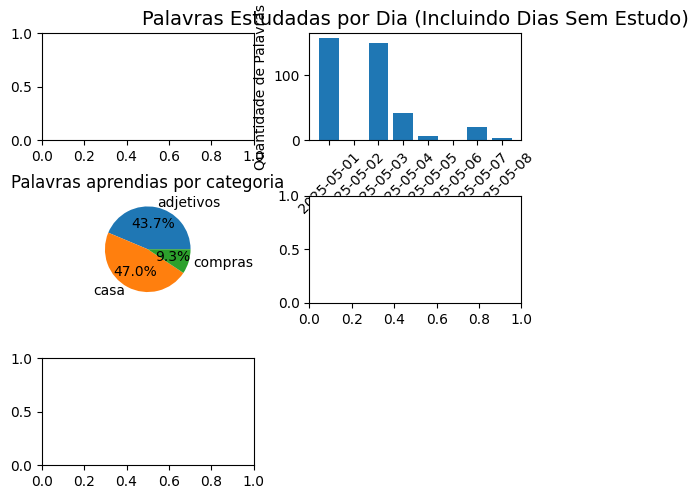

In [83]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import seaborn as sns

# Função para atualizar todos os gráficos
def atualizar_graficos(root, df:pd.DataFrame):
    # Janela principal
    # Filtro de ano
    frame_top = ttk.Frame(root)
    frame_top.pack(fill='x', padx=10, pady=5)

    # Painel KPI (percentual)
    frame_kpi = ttk.Frame(root)
    frame_kpi.pack(fill='x', padx=10, pady=5)

    label_kpi = ttk.Label(frame_kpi, text="Crescimento: --%", font=("Arial", 18), foreground='green')
    label_kpi.pack()


    ttk.Label(frame_top, text="Ano:").pack(side='left')
    combo_ano = ttk.Combobox(frame_top, values=sorted([1, 2, 3, 4, 5, 6]), state='readonly')
    combo_ano.set(4)
    combo_ano.pack(side='left', padx=5)

    ttk.Button(frame_top, text="Atualizar", command=atualizar_graficos).pack(side='left', padx=5)

    # Área dos gráficos
    frame_chart = ttk.Frame(root)
    frame_chart.pack(fill='both', expand=True)

    fig, axs = plt.subplots(3, 2, figsize=(10, 8))
    fig.tight_layout(pad=4)
    fig.delaxes(axs[2][1])  # Remove o sexto espaço não utilizado

    canvas = FigureCanvasTkAgg(fig, master=frame_chart)
    canvas.get_tk_widget().pack(fill='both', expand=True)



    # ano = int(combo_ano.get())
    # df = dados[dados['Ano'] == ano]
    # categorias = df['Categoria']
    # valores = df['Valor']
    # qtds = df['Qtd']

    for ax in fig.axes:
        ax.clear()

    gra_stydy_daily(fig.axes[1], df)
    plot_div(fig.axes[2], df)


    # Gráfico de Barras
    # gra_barras(fig.axes[0], categorias, valores)
    # gra_linhas(fig.axes[1], categorias, valores)
    # gra_pizza(fig.axes[2], categorias, valores)
    # gra_disper(fig.axes[3], categorias, valores)

    # # # Gráfico de Área (empilhado com Qtd)
    # fig.axes[4].stackplot(categorias, valores, qtds, labels=['Valor', 'Qtd'])
    # fig.axes[4].legend()
    # fig.axes[4].set_title("Gráfico de Área Empilhado")

    #     # Atualizar KPI (crescimento percentual em relação a 2023)
    # if ano != 2023:
    #     total_atual = dados[dados['Ano'] == ano]['Valor'].sum()
    #     total_2023 = dados[dados['Ano'] == 2023]['Valor'].sum()
    #     if total_2023 > 0:
    #         crescimento = ((total_atual - total_2023) / total_2023) * 100
    #         cor = "green" if crescimento >= 0 else "red"
    #         label_kpi.config(text=f"Crescimento: {crescimento:.1f}%", foreground=cor)

    canvas.draw()

# Conversão da data
df["datetime"] = pd.to_datetime(df["datetime"])
df["date"] = df["datetime"].dt.date

root = tk.Tk()
root.title("Painel Multi-Gráficos - Estilo Power BI")
root.geometry("1000x600")
atualizar_graficos(root, df)
root.mainloop()

In [14]:
# df_word_count_per_day.plot(kind="bar", x="datetime_per_day", y="word_count")

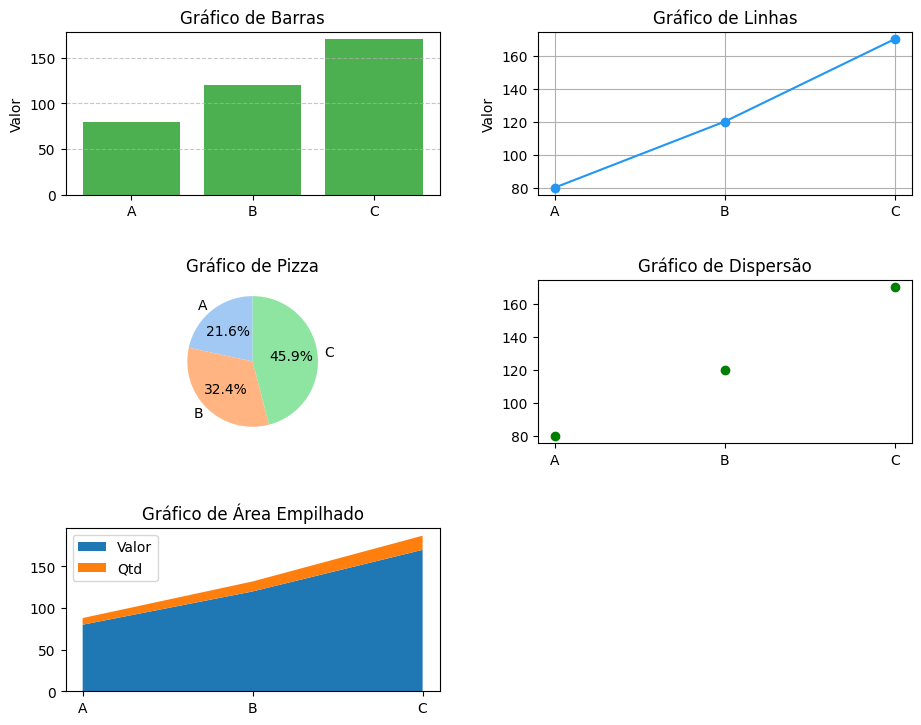

In [ ]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Dados de exemplo
dados = pd.DataFrame({
    'Categoria': ['A', 'B', 'C', 'A', 'B', 'C'],
    'Valor': [100, 150, 200, 80, 120, 170],
    'Qtd': [10, 15, 20, 8, 12, 17],
    'Ano': [2023, 2023, 2023, 2024, 2024, 2024]
})


def gra_barras(ax, categorias, valores):
    ax.bar(categorias, valores, color="#4CAF50")
    ax.set_title("Gráfico de Barras")
    ax.set_ylabel("Valor")
    ax.grid(axis='y', linestyle='--', alpha=0.7)

def gra_linhas(ax, categorias, valores):
    ax.plot(categorias, valores, marker='o', linestyle='-', color="#2196F3")
    ax.set_title("Gráfico de Linhas")
    ax.set_ylabel("Valor")
    ax.grid(True)

def gra_pizza(ax, categorias, valores):
    ax.pie(valores, labels=categorias, autopct="%1.1f%%", startangle=90,
           colors=sns.color_palette("pastel"))
    ax.set_title("Gráfico de Pizza")

# Função para atualizar todos os gráficos
def atualizar_graficos():
    ano = int(combo_ano.get())
    df = dados[dados['Ano'] == ano]
    categorias = df['Categoria']
    valores = df['Valor']
    qtds = df['Qtd']

    for ax in fig.axes:
        ax.clear()

    # Gráfico de Barras
    # gra_barras()
    # fig.axes[0].bar(categorias, valores)
    # fig.axes[0].set_title("Gráfico de Barras")

    # # Gráfico de Linhas
    # fig.axes[1].plot(categorias, valores, marker='o')
    # fig.axes[1].set_title("Gráfico de Linhas")

    # # Gráfico de Pizza
    # # df_category_word_mean.plot(kind="pie", x="category", y="category_word_mean")
    # fig.axes[2].pie(x=df_category_word_mean["category_word_mean"], labels=df_category_word_mean["category"], autopct='%1.1f%%')
    # # fig.axes[2].legend()
    # fig.axes[2].set_title("Palavras aprendias por categoria")
    

    # Gráfico de Dispersão
    fig.axes[3].scatter(categorias, valores, color='green')
    fig.axes[3].set_title("Gráfico de Dispersão")

    # Gráfico de Área (empilhado com Qtd)
    fig.axes[4].stackplot(categorias, valores, qtds, labels=['Valor', 'Qtd'])
    fig.axes[4].legend()
    fig.axes[4].set_title("Gráfico de Área Empilhado")

        # Atualizar KPI (crescimento percentual em relação a 2023)
    if ano != 2023:
        total_atual = dados[dados['Ano'] == ano]['Valor'].sum()
        total_2023 = dados[dados['Ano'] == 2023]['Valor'].sum()
        if total_2023 > 0:
            crescimento = ((total_atual - total_2023) / total_2023) * 100
            cor = "green" if crescimento >= 0 else "red"
            label_kpi.config(text=f"Crescimento: {crescimento:.1f}%", foreground=cor)

    canvas.draw()

# Janela principal
root = tk.Tk()
root.title("Painel Multi-Gráficos - Estilo Power BI")
root.geometry("1000x700")

# Filtro de ano
frame_top = ttk.Frame(root)
frame_top.pack(fill='x', padx=10, pady=5)

# Painel KPI (percentual)
frame_kpi = ttk.Frame(root)
frame_kpi.pack(fill='x', padx=10, pady=5)

label_kpi = ttk.Label(frame_kpi, text="Crescimento: --%", font=("Arial", 18), foreground='green')
label_kpi.pack()


ttk.Label(frame_top, text="Ano:").pack(side='left')
combo_ano = ttk.Combobox(frame_top, values=sorted(dados['Ano'].unique()), state='readonly')
combo_ano.set(dados['Ano'].max())
combo_ano.pack(side='left', padx=5)

ttk.Button(frame_top, text="Atualizar", command=atualizar_graficos).pack(side='left', padx=5)

# Área dos gráficos
frame_chart = ttk.Frame(root)
frame_chart.pack(fill='both', expand=True)

fig, axs = plt.subplots(3, 2, figsize=(10, 8))
fig.tight_layout(pad=4)
fig.delaxes(axs[2][1])  # Remove o sexto espaço não utilizado

canvas = FigureCanvasTkAgg(fig, master=frame_chart)
canvas.get_tk_widget().pack(fill='both', expand=True)

# Primeira renderização
atualizar_graficos()

root.mainloop()


In [ ]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Dados simulados
dados = pd.DataFrame({
    'Categoria': ['A', 'B', 'C'],
    'Valor_2023': [100, 150, 200],
    'Valor_2024': [110, 180, 220],
})

# Função para calcular e atualizar o KPI
def atualizar_kpi():
    total_2023 = dados['Valor_2023'].sum()
    total_2024 = dados['Valor_2024'].sum()
    crescimento = ((total_2024 - total_2023) / total_2023) * 100
    label_kpi.config(text=f"Crescimento: {crescimento:.1f}%")

# Função para atualizar o gráfico
def atualizar_graficos():
    fig.clear()
    ax = fig.add_subplot(111)

    categorias = dados['Categoria']
    valores_2023 = dados['Valor_2023']
    valores_2024 = dados['Valor_2024']

    ax.bar(categorias, valores_2023, label='2023')
    ax.bar(categorias, valores_2024, label='2024', alpha=0.7)
    ax.set_title("Comparativo de Valores")
    ax.legend()

    canvas.draw()
    atualizar_kpi()

# Janela principal
root = tk.Tk()
root.title("Dashboard Estilo Power BI com KPI")
root.geometry("800x600")

# Frame superior com KPI
frame_top = ttk.Frame(root)
frame_top.pack(fill='x', padx=10, pady=10)

label_kpi = ttk.Label(frame_top, text="Crescimento: --%", font=("Arial", 20), foreground='green')
label_kpi.pack()
    
# Frame para o gráfico
frame_chart = ttk.Frame(root)
frame_chart.pack(fill='both', expand=True)

fig = plt.Figure(figsize=(6, 4), dpi=100)
canvas = FigureCanvasTkAgg(fig, master=frame_chart)
canvas.get_tk_widget().pack(fill='both', expand=True)

# Botão de atualização
ttk.Button(root, text="Atualizar", command=atualizar_graficos).pack(pady=5)

# Primeira renderização
atualizar_graficos()

root.mainloop()
